<h1><font color="#113D68" size=6>Improving Deep Learning by Exploiting Synthetic Images</font></h1>

<h1><font color="#113D68" size=5>Part 1. Convolutional Neural Networks</font></h1>

<h1><font color="#113D68" size=4>Object recognitions</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Licencia</font></h2>

<p><small><small>Improving Deep Learning by Exploiting Synthetic Images Copyright 2024 Manuel Castillo Cara.</p>
<p><small><small> Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at </p>
<p><small><small> <a href="https://www.apache.org/licenses/LICENSE-2.0">https://www.apache.org/licenses/LICENSE-2.0</a> </p>
<p><small><small> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License. </p>
    
---

---

<a id="indice"></a>
<h2><font color="#004D7F" size=6>Índice</font></h2>

* [1. Definición, consejos y problemas](#section1)
    * [1.1. Ejemplo](#section12)
    * [1.2. Finnetunning](#section12)
    * [1.3. Transfer Learning](#section13)
* [2. Dataset: Flickr Style](#section2)
    * [2.1. Preparación del dataset](#section21)
    * [2.2. Cargando una red pre-entrenada](#section22)
* [3. MobileNet](#section3)
    * [3.1. Cargar la red](#section32)
    * [3.2. Uso de iteradores](#section32)
    * [3.3. Predicciones con el modelo base](#section33)
* [4. VGG16](#section4)
    * [4.1. Cargar la red](#section42)
    * [4.2. Uso de iteradores](#section42)
    * [4.3. Predicciones con el modelo base](#section43)
* [5. Extracción de características](#section5)
    * [5.1. Cargar la red](#section52)
    * [5.2. Uso de iteradores](#section52)
    * [5.3. Predicciones con el modelo base](#section53)
    * [5.4. Resultados con modelos clásicos](#section54)
* [6. Finetuning](#section6)
    * [6.1. Cargar la red](#section61)
    * [6.2. Añadir capas a la red](#section62)
    * [6.3. Uso de iteradores](#section63)
    * [6.4. Actualización de pesos](#section64)
    * [6.5. Resultados del modelo](#section65)

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Definición, consejos y problemas</font>

En prácticas anteriores ya hemos visto algunos conceptos básicos sobre como crear nuestras propias redes neuronales. Durante el desarrollo de las mismas habréis observado que conforme va aumentando la complejidad de la red, asi como el tamaño de nuestros datos, los resultados mejoran, a costa del tiempo de entrenamiento.

Sin embargo, ¿qué ocurre cuando no disponemos de datos suficientes o de los recursos necesarios? ¿Es posible utilizar deep learning?
1. Si la cantidad de datos que tenemos es pequeña, entrenar una red neuronal es una tarea complicada. 
2. Si reducimos el tamaño de la red, los resultados que obtengamos pueden que no sean del todo satisfactorios, ya que se va a tratar de un modelo relativamente simple. 
3. Si la red es demasiado grande, los pesos no se ajustarán adecuadamente con los pocos datos de entrenamiento y puede que incluso sobreajustemos a dicha información.

Otra de las limitaciones de las redes neuronales son los tiempos de entrenamiento. Cuando contamos con suficientes datos como para entrenar una red, podemos permitirnos aumentar el tamaño de esta. Sin embargo, esto aumenta el tiempo de los procesos `forward` y `backward` y la complejidad para ajustar los hiperparámetros. 

Por todos estos motivos surge el **Transfer Learning**, donde las redes neuronales aprendidas en problemas en los que hay más disponibilidad de datos se utilizan para resolver otros problemas para los que no fueron diseñadas.

<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Ejemplo</font>

Un ejemplo de esto es AlexNet, representada en la imagen, que aprende propiedades de las imágenes que van desde lo más general en las primeras capas hasta las 1.000 etiquetas en su última capa, que indican muy concretamente un objeto identificado en la imagen. 

Durante el proceso `forward` no sólo obtenemos las probabilidades de la última capa, si no que en todas las demás capas se generan una **serie de activaciones** que se pueden interpretar como un conjunto de características que describen la imagen. Estas características pueden utilizarse directamente para entrenar otros modelos como por ejemplo un regresor lineal, un arból de decisión, etc.


<img src="img/AlexNet-CNN.png" width="550">

<a id="section12"></a>
# <font color="#004D7F" size=5> 1.2. Finnetunning</font>

Este concepto consiste en el entrenamiento parcial de redes ya entrenadas, es decir, es posible editar la estructura de parte de una red neural que ya ha sido entrenada y aprender nuevos pesos sólo para las capas modificadas. 

Esto reduce mucho el tiempo de entrenamiento y la cantidad de imágenes necesarias. Volviendo al caso de AlexNet, es posible eliminar la última capa con la salida de 1.000 etiquetas y añadir una nueva capa con la salida de nuestro problema.

<img src="img/finetunning.png" width="550">

<a id="section13"></a>
# <font color="#004D7F" size=5> 1.3. Transfer Learning</font>

En los últimos años, el **Transfer Learning** ha permitido poder utilizar el conocimiento generado en redes neuronales entrenadas con grandes bases de datos. Además, los resultados obtenidos de estas técnicas han superado en muchos problemas el estado del arte y es un area de investigación fuertemente activa. Gracias a esto, se han desarrollado una serie de pautas que, dependiendo de la cantidad de datos del problema y de su similitud con los datos de la red entrenada, nos indicarán que estrategia de Transfer Learning es más adecuada:


|  | **Problemas similares** | **Problemas diferentes** |
| --- | --- | --- |
| **Pocos datos** | Extraer características de las últimas capas y utilizarlas en otros modelos | El peor escenario, se puede probar a obtener características de capas previas a las últimas y utilizarlas en otros modelos |
| **Nº medio de datos** | Finetunning de pocas capas | Finetunning de muchas capas |

En esta práctica vamos a ver como obtener las activaciones que provoca el paso `forward` y como utilizar dicha información para entrenar otros modelos con SciKit. También vamos a ver como realizar finetunning, para utilizar algunas de las redes neuronales más famosas en nuestros problemas.

In [ ]:
#pip install scikit-image

In [1]:
import tensorflow as tf
import os
import random
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import skimage

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# SET RANDOM SEED FOR REPRODUCIBILITY
SEED = 420
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_5077/2076018544.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Dataset: Flickr Style</font>

Esta base de datos se basa en un conjunto de imágenes de Flickr etiquetadas con un estilo fotográfico. La base de datos original consta de 80K imágenes y 20 estilos diferentes. 

En esta práctica vamos a trabajar con un subconjunto de 2K imágenes de 5 estilos diferentes. Esto se ha hecho para que nos de tiempo a ver todos los conceptos en esta la práctica y poder trabajar tanto en la **extracción de características como en el `finetuning`**. Sin embargo, es posible resolver el problema con el conjunto total de imágenes y algo de paciencia. 

Entrenar una red desde 0 para este problema con 80K imágenes puede no ser suficiente y seguramente los resultados sean peores que con las técnicas de Transfer Learning. Recordad que ImageNet está formada por 1,2M de imágenes.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información de esta base de datos [Flickr](http://sergeykarayev.com/files/1311.3715v3.pdf)

In [4]:
# Instalar aplicación de descarga
#!pip install gdown

In [7]:
import gdown
!gdown --id 1uaOwnmnJX67DKsLz5tzGWB6KUKkh99UJ
!unzip -q flickr_style.zip
!mkdir data
!mv flickr_style data/

/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/manwest/Library/Python/3.9/lib/python/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1uaOwnmnJX67DKsLz5tzGWB6KUKkh99UJ
From (redirected): https://drive.google.com/uc?id=1uaOwnmnJX67DKsLz5tzGWB6KUKkh99UJ&confirm=t&uuid=0682def4-454b-4f15-b7c9-7819bc9628d2
To: /Users/manwest/Git/UPM-TINTOlib/flickr_style.zip
100%|████████████████████████████████████████| 178M/178M [00:20<00:00, 8.87MB/s]
mkdir: data: File exists


<a id="section21"></a>
# <font color="#004D7F" size=5>2.1. Preparación del dataset</font>

A continuación vamos a ver la base de datos y la vamos a preparar para su uso en Keras.

In [8]:
#pip install pyqlib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pyqlib (from versions: none)
ERROR: No matching distribution found for pyqlib


In [7]:
#!pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [22]:
from sklearn.model_selection import train_test_split

STYLE_NUM_LABELS = 5
# obtenemos el nombre de las primeras etiquetas seleccionadas
style_label_file = 'https://raw.githubusercontent.com/BVLC/caffe/master/examples/finetune_flickr_style/style_names.txt'
# En Mac da error con el delimiter en \n
#style_labels = list(np.loadtxt(style_label_file, str, delimiter='\n', encoding="utf-8"))
style_labels = list(np.loadtxt(style_label_file, str, delimiter='\t', encoding="utf-8"))

if STYLE_NUM_LABELS > 0:
    style_labels = style_labels[:STYLE_NUM_LABELS]

train_valid_frame = pd.read_csv('data/flickr_style/train.txt', sep=" ", header=None)
train_valid_frame.columns = ['files','lab_idx']
train_valid_frame['labels'] = train_valid_frame['lab_idx'].map({i:j for i,j in enumerate(style_labels)})

train_frame, valid_frame = train_test_split(
    train_valid_frame, test_size=0.2, random_state=SEED, stratify=train_valid_frame['labels'])

test_frame = pd.read_csv('data/flickr_style/test.txt', sep=" ", header=None)
test_frame.columns = ['files','lab_idx']
test_frame['labels'] = test_frame['lab_idx'].map({i:j for i,j in enumerate(style_labels)})

In [20]:
valid_frame

files  lab_idx      labels
340   data/flickr_style/images/2261630484_549c553b91...        3        Noir
1129  data/flickr_style/images/2276032901_1fc1ebcaed...        3        Noir
1018  data/flickr_style/images/12639075544_25ef5d809...        2  Melancholy
83    data/flickr_style/images/9986749165_471936640c...        0    Detailed
698   data/flickr_style/images/10655319485_85da6f847...        0    Detailed
...                                                 ...      ...         ...
484   data/flickr_style/images/13165484485_d09725e40...        4         HDR
410   data/flickr_style/images/12674376585_3b62aa697...        2  Melancholy
52    data/flickr_style/images/12717866885_7eddd9724...        4         HDR
346   data/flickr_style/images/11257379225_6a32d8b4c...        0    Detailed
1167  data/flickr_style/images/9440734001_c392cb853b...        0    Detailed

[277 rows x 3 columns]

Echamos un vistazo a algunas imágenes

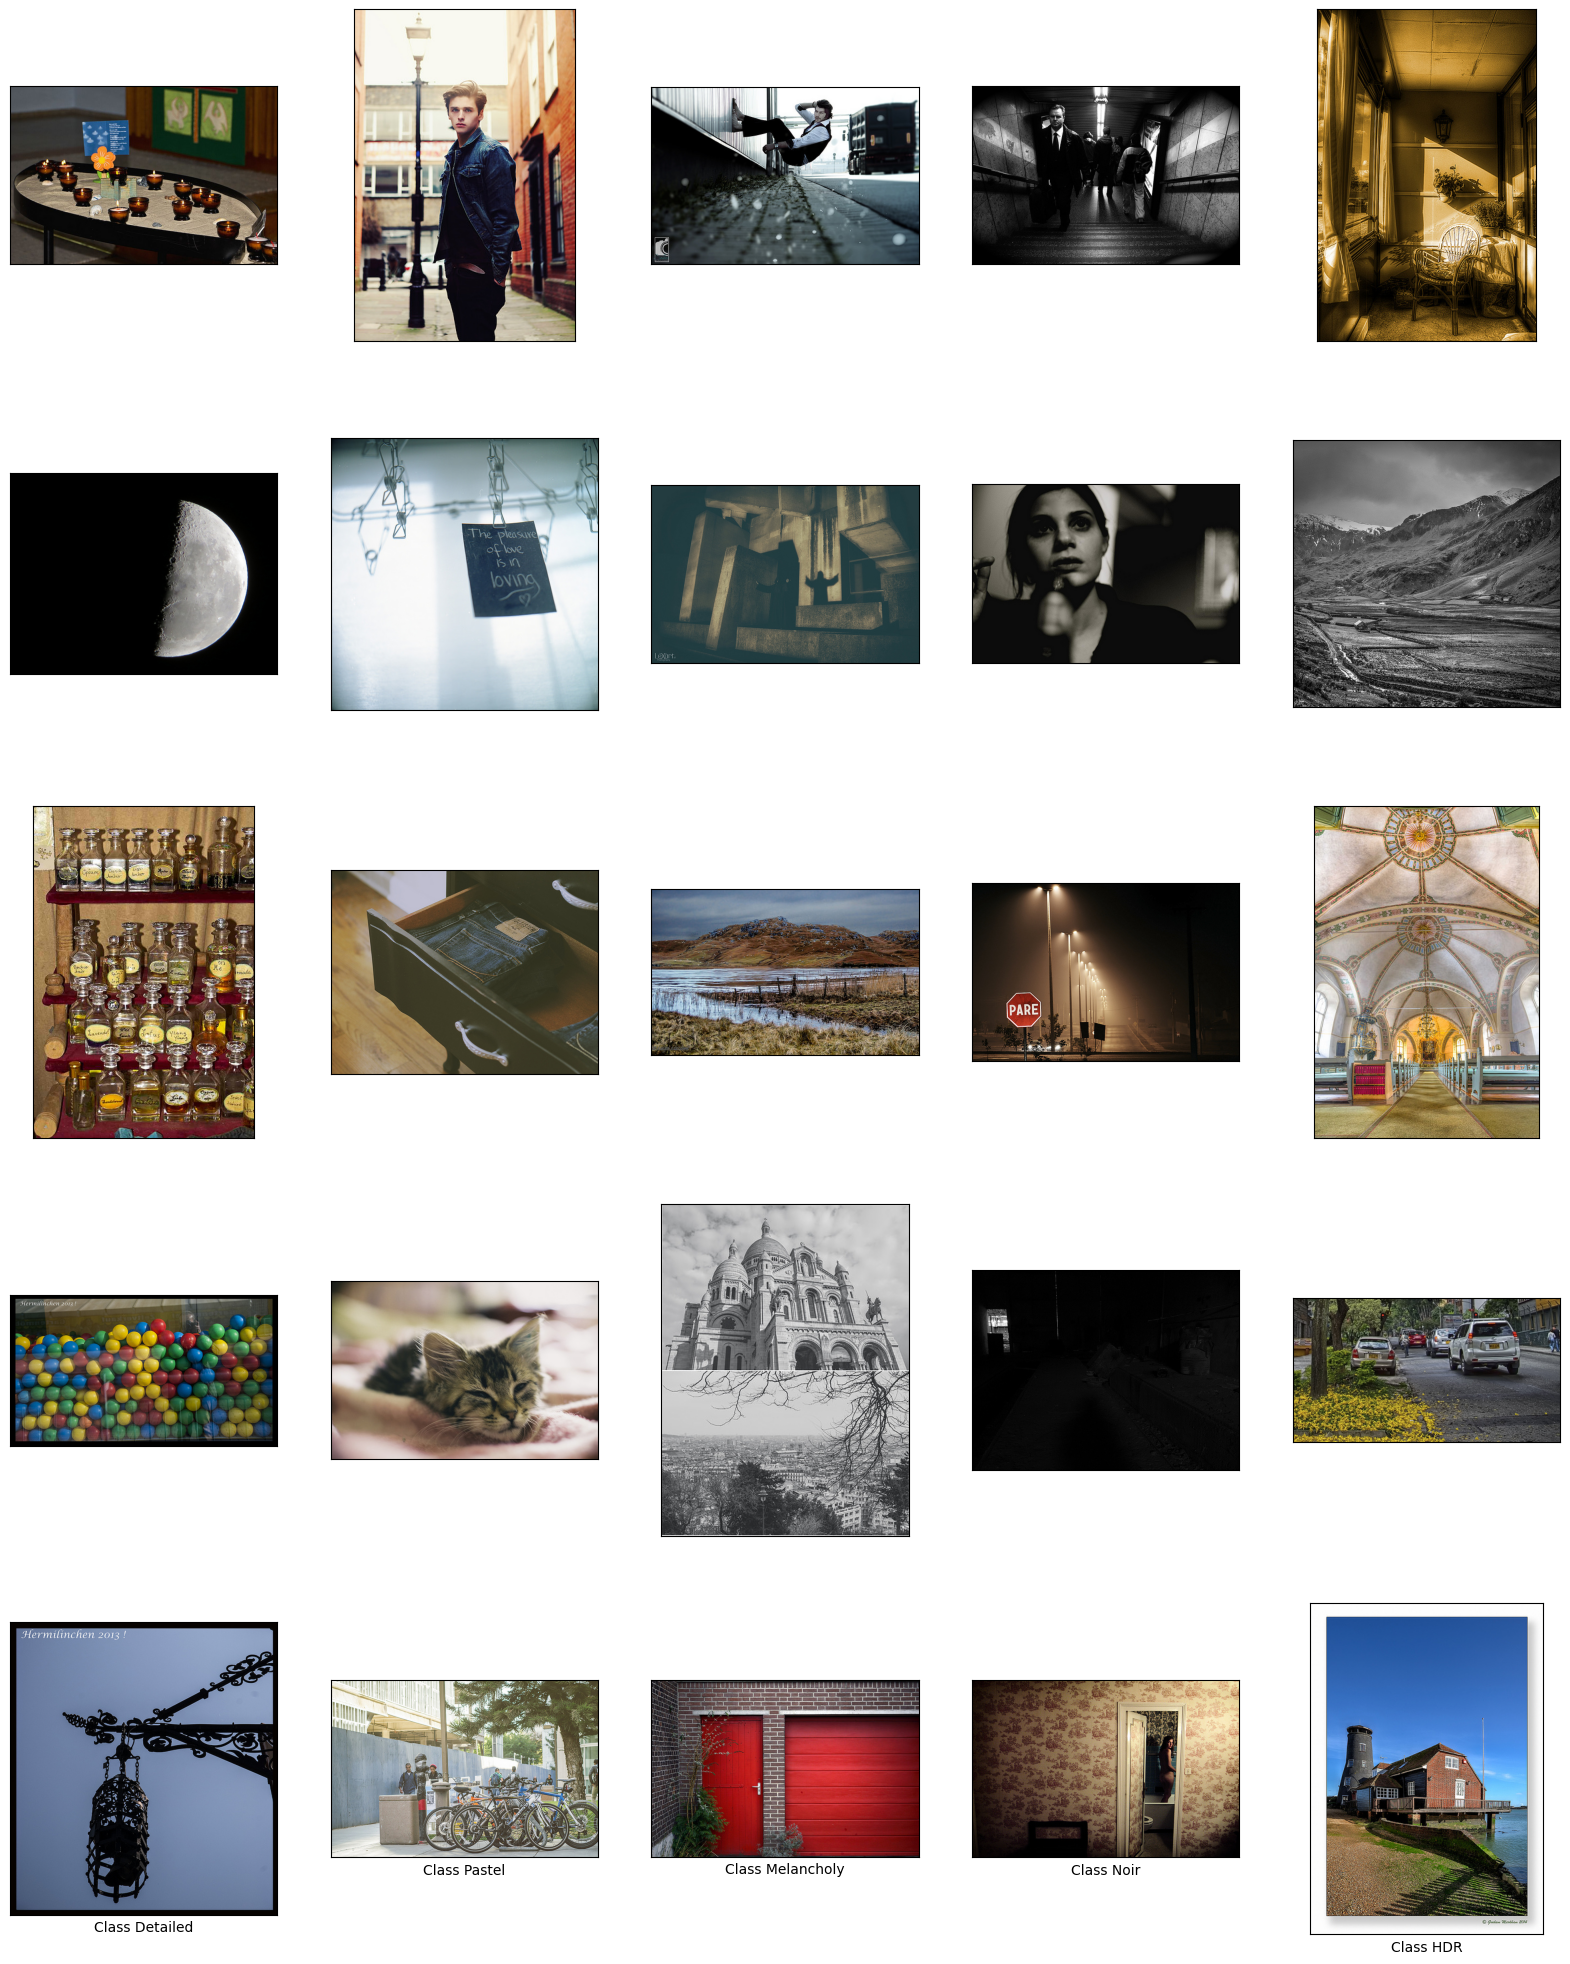

In [21]:
# Mostramos 5 imágenes de cada clase.
plot_n_images = 5
fig = plt.figure(figsize=(20, 25))

np.random.seed(1000)
for i in range(0,STYLE_NUM_LABELS):
    select_frame = train_frame[train_frame['lab_idx']==i]
    for j in range(0,plot_n_images):
        aux_index = np.random.choice(select_frame.index)
        fig_i=fig.add_subplot(plot_n_images,STYLE_NUM_LABELS,j*STYLE_NUM_LABELS+i+1)
        fig_i.imshow(plt.imread(train_frame['files'][aux_index]))
        
        fig_i.set_xticks(())
        fig_i.set_yticks(())
        
    fig_i.set_xlabel('Class %s' % style_labels[i])

<a id="section22"></a>
# <font color="#004D7F" size=5>2.2. Cargando una red pre-entrenada</font>

Existen multitud de estructuras de redes dependiendo del problema y, al revés, existen redes que se pueden utilizar en muchos problemas. 
+ Por ejemplo, en ImageNet, el problema de etiquetado de imágenes, existen diferentes redes como AlexNet, Inception, MobileNet, ResNet, centradas en capas convolucionales y cada una con sus peculiaridades. Sin embargo, estas redes también pueden utilizarse para otros problemas de etiquetado de imágenes como son CIFAR, COCO o Flowers.

La gran cantidad de imagenes de ImageNet ha permitido que se haya convertido en referencia dentro de la investigación en el tratamiento de imágenes y del propio Deep Learning. Es por eso que existen gran cantidad de redes que tratan de resolver este problema y podemos encontrar diferentes implementaciones para casi todas las librerías de Deep Learning y lo que es más importante, los pesos para poder cargar las redes ya entrenadas.

Keras tiene actualmente 20 modelos pre-entrenados con ImageNet en **Applications** que incluyen Inception, ResNet, MobileNet y muchos más. Vamos a utilizar estas funciones para cargar los modelos y realizar los procesos de Transfer Learning.

Lo primero es elegir la red con la que queremos trabajar. En este tutorial vamos a utilizar 2: **MobileNet** y **VGG16**.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre los modelos pre-entrenados con ImageNet en [Applications](https://keras.io/applications/).

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. MobileNet</font>

Se trata de una red basada en **Inception** pero optimizada para poder ser ejecutada en dispositivos más limitados como puede ser un teléfono móvil. Aunque sus resultados son algo peores que los de redes más grandes, su reducido tamaño y la velocidad de procesar las imágenes la han convertido en una de las más populares.

<a id="section31"></a>
# <font color="#004D7F" size=5>3.1. Cargar la red</font>

Vamos a ver el proceso para cargar dicha red, ver su estructura y utilizarla para realizar predicciones.

In [23]:
from keras.applications import mobilenet

model = mobilenet.MobileNet(weights='imagenet')

2024-05-06 17:51:59.735003: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-06 17:51:59.735022: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-05-06 17:51:59.735031: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-05-06 17:51:59.735063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-06 17:51:59.735077: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


17225924/17225924 [==============================] - 2s 0us/step


In [24]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

La estructura está compuesta de 13 bloques _Depthwise Convolution_ y la correspondiente capa Densa de la salida.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información sobre las diferencias de convolución Depthwise con respecto a la convolución normal en este [enlace](https://medium.com/@sagar.tesla/depthwise-separable-convolution-in-caffe-framework-a3a0cf026aee).

<a id="section32"></a>
# <font color="#004D7F" size=5>3.2. Uso de iteradores</font>

Las imágenes tienen de media unos 200KB de tamaño, por lo que las 2K imágenes ocuparán en memoria 400MB. Actualmente, cualquier ordenador puede manejar esta cantidad de información. Sin embargo, trabajar con 80K imágenes a la vez ya si que es inviable.

Es por esto que vamos a utilizar `ImageDataGenerator` y la función `flow_from_dataframe` para crear los iteradores con la base de datos para no tener todo cargado en memoria. Esta función se vio en detalle en la Práctica anterior. Sin embargo, antes de llevar a cabo este proceso, las diferentes redes tienen funciones que preprocesan las imágenes de forma óptima, por lo que una vez carguemos la red, es cuando realizaremos este proceso.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información de interadore en la [documentación de Keras](https://keras.io/preprocessing/image/).

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar
train_datagen = ImageDataGenerator(preprocessing_function = mobilenet.preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function = mobilenet.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = mobilenet.preprocess_input)

# y con esta indicamos como vamos a leer la información y de donde.
train_iter = train_datagen.flow_from_dataframe(train_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=True)


valid_iter = valid_datagen.flow_from_dataframe(valid_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame, 
                                             x_col='files', 
                                             y_col='labels', 
                                             target_size=(224, 224), 
                                             class_mode='categorical',
                                             batch_size=32, 
                                             shuffle=False)

Found 1108 validated image filenames belonging to 5 classes.
Found 277 validated image filenames belonging to 5 classes.
Found 320 validated image filenames belonging to 5 classes.


<a id="section33"></a>
# <font color="#004D7F" size=5>3.3. Predicciones con el modelo base</font>

El modelo cargado ya viene directamente con los pesos entrenados, por lo que ya podemos utilizarla para hacer predicciones de nuestras imágenes. Vamos a ver un ejemplo.

2024-05-06 17:52:21.099899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


35363/35363 [==============================] - 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

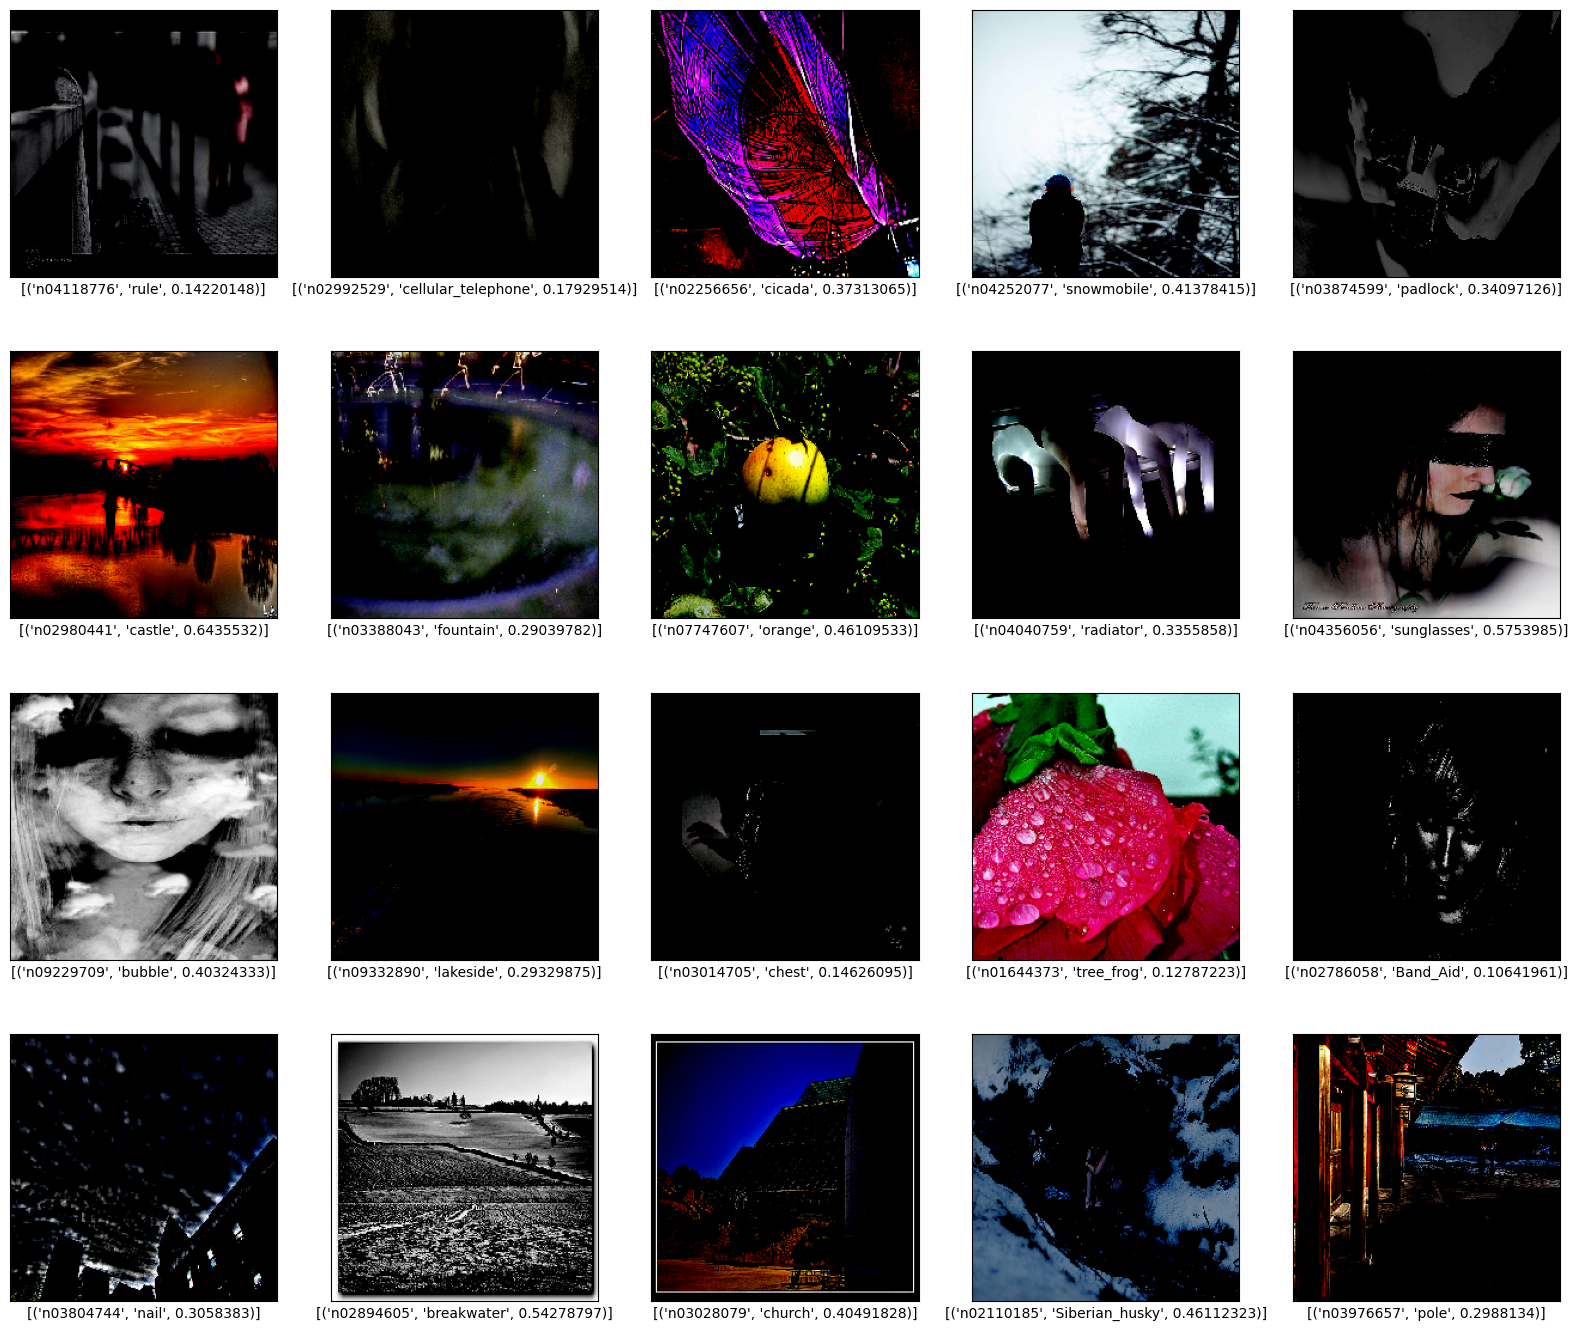

In [27]:
# accedemos al primer batch y nos quedamos solo con las imágenes
test_images = next(test_iter)[0]

# realizamos las predicciones
preds = model.predict(test_images)
pred_labels = mobilenet.decode_predictions(preds, top=1)

# Mostramos las 20 imágenes del batch y las etiquetas asignadas por MobileNet.
plot_n_images = 20
fig = plt.figure(figsize=(20, 17))

for i in range(0,5):
    for j in range(0,4):
        counter = i*4+j
        fig_i=fig.add_subplot(4,5,counter+1)
        fig_i.imshow(test_images[counter])

        fig_i.set_xticks(())
        fig_i.set_yticks(())
        
        fig_i.set_xlabel('%s' % pred_labels[counter])

Las imágenes mostradas están ya un tanto distorsionadas porque han sido preprocesadas para MobileNet, aun así, ya podemos observar que acierta algunos de los objetos de las imágenes. Aunque este no sea nuestro objetivo es curioso como es capaz de detectar ciertos elementos incluso en imágenes a las que se le han aplicado modificaciones.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. VGG16</font>

Ahora es el turno de VGG16, al igual que antes, vamos a descargar los pesos aprendidos con ImageNet y ver la estructura de la red. En la siguiente imagen se puede observar también la estructura original.

<img src="img/vgg16.png" width="550">

<a id="section41"></a>
# <font color="#004D7F" size=5>4.1. Cargar la red</font>

Vamos a ver el proceso para cargar dicha red, ver su estructura y utilizarla para realizar predicciones.

In [28]:
from keras.applications import vgg16

model = vgg16.VGG16(weights='imagenet')

553467096/553467096 [==============================] - 34s 0us/step


In [29]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

En este caso, VGG16 está compuesta por 5 bloques de capas convoluciones, finalizando con 2 capas Fully Conected y la softmax de 1000. Esta red es bastante grande, sobre todo en lo que a número de parámetros se refiere. 
 + Si nos fijamos, MobileNet con muchas más capas, solo tiene 4 millones de parámetros, frente a los casi 140 millones de VGG16.

Esta red es también una de las más populares en la literatura, pero su gran tamaño y su bajo rendimiento frente a otras alternativas está haciendo que cada vez sea menos usada. 
+ Sin embargo, para los procesos de extracción de características nos es muy útil por sus capas densas, como más adelante veremos.

<a id="section42"></a>
# <font color="#004D7F" size=5>4.2. Uso de iteradores</font>

Como anteriormente utilizamos iteradores para ver procesar adecuadamente los datos en memoria por batchs.

In [30]:
from keras.preprocessing.image import ImageDataGenerator

# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar
train_datagen = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)

# y con esta indicamos como vamos a leer la información y de donde.
train_iter = train_datagen.flow_from_dataframe(train_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=True)


valid_iter = valid_datagen.flow_from_dataframe(valid_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame, 
                                             x_col='files', 
                                             y_col='labels', 
                                             target_size=(224, 224), 
                                             class_mode='categorical',
                                             batch_size=32, 
                                             shuffle=False)

Found 1108 validated image filenames belonging to 5 classes.
Found 277 validated image filenames belonging to 5 classes.
Found 320 validated image filenames belonging to 5 classes.


<a id="section43"></a>
# <font color="#004D7F" size=5>4.3. Predicciones con el modelo base</font>

El modelo cargado ya viene directamente con los pesos entrenados, por lo que ya podemos utilizarla para hacer predicciones de nuestras imágenes. 

Vamos a volver a ver que tal clasifica dicha red con algunas de las imágenes de Flickr.

1/1 [==============================] - 0s 281ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

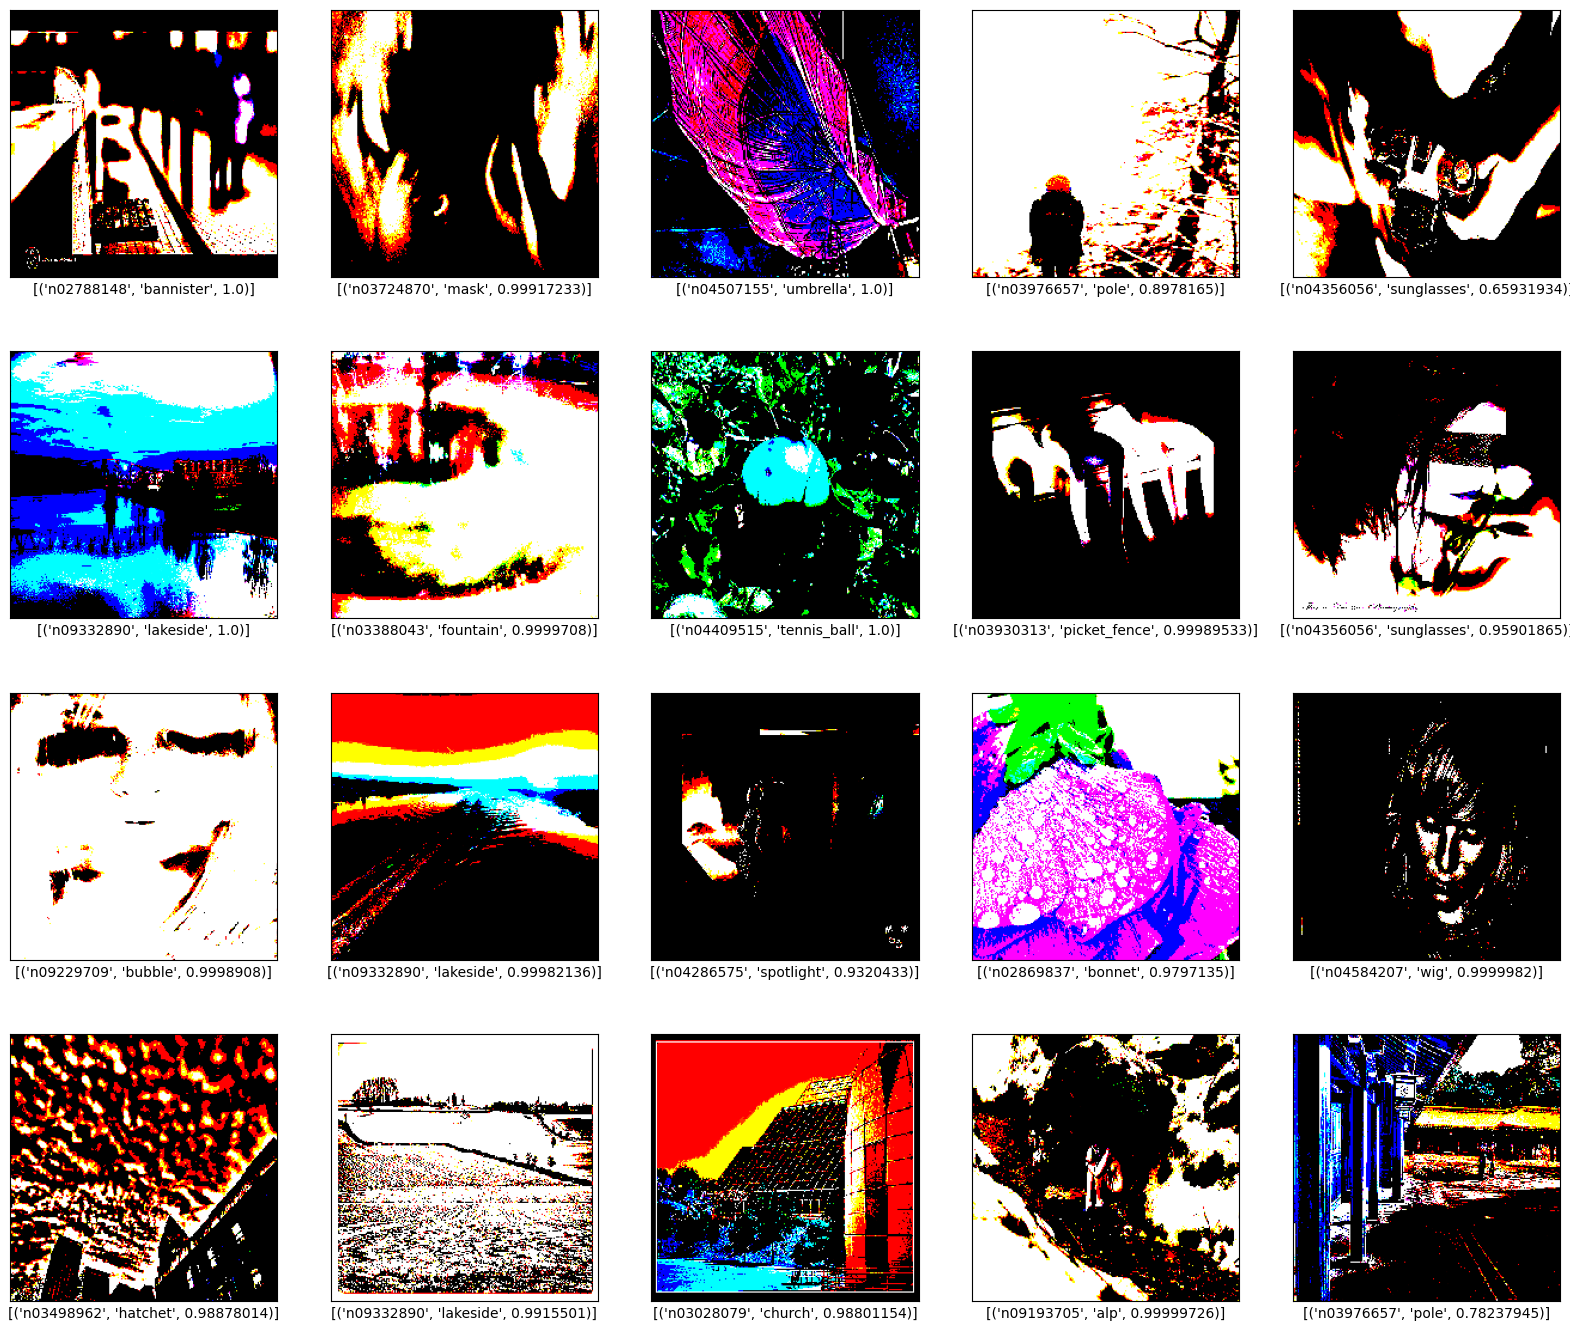

In [31]:
# accedemos al primer batch y nos quedamos solo con las imágenes
test_images = next(test_iter)[0]

# realizamos las predicciones
preds = model.predict(test_images)
pred_labels = vgg16.decode_predictions(preds, top=1)

# Mostramos las 20 imágenes del batch y las etiquetas asignadas por MobileNet.
plot_n_images = 20
fig = plt.figure(figsize=(20, 17))

for i in range(0,5):
    for j in range(0,4):
        counter = i*4+j
        fig_i=fig.add_subplot(4,5,counter+1)
        fig_i.imshow(test_images[counter])

        fig_i.set_xticks(())
        fig_i.set_yticks(())
        
        fig_i.set_xlabel('%s' % pred_labels[counter])

En este caso, las imágenes preprocesadas son incluso menos visibles que antes, pero también hemos obtenido predicciones que podemos comparar con las imágenes más arriba. 

También hay que destacar la importancia del preprocesado, ya que cada red ha sido entrenada aplicando unas modificaciones a las imágenes y esta debe respetarse.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Extracción de características</font>

Ya tenemos lista nuestra base de datos y dos redes pre-entrenadas diferentes. Sin embargo, aun no hemos resuelto el problema, ya que las etiquetas que hemos obtenido en la sección anterior no corresponden con las etiquetas de la base de datos. 

Para resolver el problema vamos a empezar con la primera técnica de Transfer Learning, la extración de características de la red. El proceso que vamos a seguir se divide en dos partes:
1. La obtención de características de la red.
2. El entrenamiento de modelos con las características extraídas.

El primer paso es bastante parecido al de cargar y procesar las imágenes. Ahora, en vez de obtener los resultados o activaciones de la última capa (1000 etiquetas), vamos a tratar de coger las activaciones de la capa anterior, `fc2` de tamaño 4096 para VGG16 y `global_average_pooling2d_1` de tamaño 1024 para MobileNet.

<a id="section51"></a>
# <font color="#004D7F" size=5>5.1. Cargar la red</font>

Vamos a ver el proceso para cargar dicha red, ver su estructura y utilizarla para realizar predicciones.

Creamos un nuevo objeto Model que tenga el mismo **input** que el modelo base, y de **output** la capa que queramos, en este caso, fc2

In [32]:
# cargamos el modelo base
from keras.applications import vgg16
from keras.models import Model

base_model = vgg16.VGG16(weights='imagenet')

model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<a id="section52"></a>
# <font color="#004D7F" size=5>5.2. Uso de iteradores</font>

Como estamos con VGG hay que preparar los iteradores

In [33]:
from keras.preprocessing.image import ImageDataGenerator

# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar
train_datagen = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)

# y con esta indicamos como vamos a leer la información y de donde.
train_iter = train_datagen.flow_from_dataframe(train_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=1, 
                                               shuffle=False)


valid_iter = valid_datagen.flow_from_dataframe(valid_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=1, 
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame, 
                                             x_col='files', 
                                             y_col='labels', 
                                             target_size=(224, 224), 
                                             class_mode='categorical',
                                             batch_size=1, 
                                             shuffle=False)

Found 1108 validated image filenames belonging to 5 classes.
Found 277 validated image filenames belonging to 5 classes.
Found 320 validated image filenames belonging to 5 classes.


<a id="section53"></a>
# <font color="#004D7F" size=5>5.3. Predicciones con el modelo base</font>

Luego solo deberemos llamar a predict con nuestro iterador en cada caso y ver los resultados.

In [34]:
x_fc2_train = model.predict(train_iter, steps= train_frame.shape[0]//train_iter.batch_size)
y_train = train_iter.classes

x_fc2_valid = model.predict(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
y_valid = valid_iter.classes

x_fc2_test = model.predict(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
y_test = test_iter.classes

320/320 [==============================] - 3s 9ms/step


In [35]:
print("Train features: ", x_fc2_train.shape)
print("Train class: ", len(y_train))
print()
print("Valid features: ", x_fc2_valid.shape)
print("Valid class: ", len(y_valid))
print()
print("Test features: ", x_fc2_test.shape)
print("Test class: ", len(y_test))
print()

Train features:  (1108, 4096)
Train class:  1108

Valid features:  (277, 4096)
Valid class:  277

Test features:  (320, 4096)
Test class:  320



<a id="section54"></a>
# <font color="#004D7F" size=5>5.4. Resultados con modelos clásicos</font>

Ahora tenemos un descriptor de la imagen de tamaño 4096. Vamos a ver como es su rendimiento con los algoritmos de SciKit.


In [36]:
# Importamos la clase LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# creamos un objeto con los parámetros por defecto
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(x_fc2_train, y_train)

# para obtener el accuracy mirar 'sklearn.metrics.accuracy_score'
# comparamos estos datos con la función accuracy
print('Accuracy en valid:')
print(accuracy_score(y_valid, lr.predict(x_fc2_valid)))
print('Accuracy en test:')
print(accuracy_score(y_test, lr.predict(x_fc2_test)))

Accuracy en valid:
0.6462093862815884
Accuracy en test:
0.578125


/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_fc2_train, y_train)

# para obtener el accuracy mirar 'sklearn.metrics.accuracy_score'
# comparamos estos datos con la función accuracy
print('Accuracy en valid:')
print(accuracy_score(y_valid, rf.predict(x_fc2_valid)))
print('Accuracy en test:')
print(accuracy_score(y_test, rf.predict(x_fc2_test)))

Accuracy en valid:
0.6714801444043321
Accuracy en test:
0.56875


Teniendo en cuenta la dificultad del problema, no son malos resultados, sobre todo los del regresor logístico. Estos resultados se han obtenido sin realizar ningún tipo de modificación sobre la red y sin tener que entrenarla, por eso cuando contamos con pocos datos, la extracción de características de redes neuronales es especialmente útil.

---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio</font></h3>

Se propone que se extraigan otras características de otras redes y que se utilicen en diferentes modelos. Se ha visto que hay diferentes arquitecturas, y en [Applications](https://keras.io/applications/) podemos echarles un ojo y con summary obtener los nombres de las diferentes capas, ya que no solo podemos extraer características de la penúltima capa. Además, solo hemos probado dos algoritmos con sus parámetros por defecto, hay mucho margen para la mejora en este problema.

In [ ]:
#TODO

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section6"></a>
# <font color="#004D7F" size=6>6. Finetuning</font>

Ahora es el paso de entrenar las redes. Si recordamos la imagen, en esta etapa vamos a congelar los pesos de las capas inciales y a entrenar sólo la última capa de la red. Se pueden entrenar algunas más dependiendo del problema y del número de imágenes. En este caso, como trabajamos con un subconjunto, no es necesario entrenar más.

<img src="img/finetunning.png" width="500">

Lo más sencillo en estos casos es cargar la red en la que vamos a realizar el finetuning, MobileNet en este ejemplo, de la misma forma que hemos hecho en los casos anteriores, y añadir las capas nuevas que queremos aprender a nuestro grafo. Lo que vamos a hacer es crear una nueva última capa Softmax pero esta vez con las 5 clases de nuestro problema, y esa capa recibirá la salida de `global_average_pooling2d_1`.

<a id="section61"></a>
# <font color="#004D7F" size=5>6.1. Cargar la red</font>

Vamos a ver el proceso para cargar dicha red, ver su estructura y utilizarla para realizar predicciones.

Los modelos de Keras ya vienen preparado para este proceso de finetuning. Cuando creamos un objeto de cualquier modelo tenemos la opción de `include_top`, que en el caso de ser **False** elimina las últimas capas de la red, para poder incluir nuestras modificaciones.

En el caso de querer modificar más capas, es posible con la función `pop()`, que va quitando capas empezando por el final.

Vamos a ver un ejemplo de todo esto y a ver las nuevas redes con `summary`.

In [38]:
# cargamos el modelo base
base_model = mobilenet.MobileNet(input_shape=(224, 224, 3), alpha=1, include_top=False, 
                                 pooling='avg', weights='imagenet')

# y congelamos el entrenamiento en todas las capas
for layer in base_model.layers:
    layer.trainable = False

17225924/17225924 [==============================] - 2s 0us/step


In [40]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

<a id="section62"></a>
# <font color="#004D7F" size=5>6.2. Añadir capas a la red</font>

Una vez cargada la red podemos añadir diferentes capas a la red tal y como sean nuestras necesidades. 

En este ejemplo vamos a añadir una capa Dropout y una Densa de salida con las 5 posibles clases que tenemos.

In [41]:
from keras.layers import Dropout, Dense

x = Dropout(0.75)(base_model.output)
x = Dense(5, activation='softmax', name='flickr_out')(x)

model = Model(base_model.input, x)

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

Si nos fijamos en la última capa tenemos parámetros que no están entrenados. Esto es normal ya que es una capa que hemos añadido y tenemos que realizar un entrenamiento para ajustarlos.

<a id="section63"></a>
# <font color="#004D7F" size=5>6.3. Uso de iteradores</font>

Como siempre, hay que preparar los iteradores

In [43]:
from keras.preprocessing.image import ImageDataGenerator

# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar
train_datagen = ImageDataGenerator(preprocessing_function = mobilenet.preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function = mobilenet.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = mobilenet.preprocess_input)

# y con esta indicamos como vamos a leer la información y de donde.
train_iter = train_datagen.flow_from_dataframe(train_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=True)


valid_iter = valid_datagen.flow_from_dataframe(valid_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(224, 224), 
                                               class_mode='categorical',
                                               batch_size=32, 
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame, 
                                             x_col='files', 
                                             y_col='labels', 
                                             target_size=(224, 224), 
                                             class_mode='categorical',
                                             batch_size=32, 
                                             shuffle=False)

Found 1108 validated image filenames belonging to 5 classes.
Found 277 validated image filenames belonging to 5 classes.
Found 320 validated image filenames belonging to 5 classes.


<a id="section64"></a>
# <font color="#004D7F" size=5>6.4. Actualización de pesos</font>

Con esto, ya hemos creado una nueva red con la estructura y pesos de MobileNet para el problema de ImageNet, pero hemos modificado la salida para que se adapte a nuestro problema y vamos a realizar el finetuning para ajustar los pesos de esta última capa.

In [44]:
from keras.optimizers import SGD

#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_iter,
                              steps_per_epoch = train_frame.shape[0]//train_iter.batch_size,
                              epochs=10,
                              validation_data=valid_iter, 
                              validation_steps= valid_frame.shape[0]//valid_iter.batch_size)

Epoch 1/10
34/34 [==============================] - 4s 74ms/step - loss: 2.9003 - acc: 0.2296 - val_loss: 1.4124 - val_acc: 0.3867
Epoch 2/10
34/34 [==============================] - 2s 68ms/step - loss: 2.0086 - acc: 0.3457 - val_loss: 1.2214 - val_acc: 0.5117
Epoch 3/10
34/34 [==============================] - 2s 70ms/step - loss: 1.6772 - acc: 0.4368 - val_loss: 1.1117 - val_acc: 0.5273
Epoch 4/10
34/34 [==============================] - 2s 70ms/step - loss: 1.5563 - acc: 0.4470 - val_loss: 1.0509 - val_acc: 0.5703
Epoch 5/10
34/34 [==============================] - 2s 68ms/step - loss: 1.3844 - acc: 0.4972 - val_loss: 1.0150 - val_acc: 0.5703
Epoch 6/10
34/34 [==============================] - 2s 68ms/step - loss: 1.3625 - acc: 0.5251 - val_loss: 0.9691 - val_acc: 0.6055
Epoch 7/10
34/34 [==============================] - 3s 76ms/step - loss: 1.3391 - acc: 0.5344 - val_loss: 0.9700 - val_acc: 0.6211
Epoch 8/10
34/34 [==============================] - 2s 69ms/step - loss: 1.2626 - a

<a id="section65"></a>
# <font color="#004D7F" size=5>6.5. Resultados del modelo</font>

Finalmente, una vez ajustados los pesos y entrenado el modelo modificado podemos ver los resultados

In [45]:
score = model.evaluate(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))
score = model.evaluate(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

8/8 [==============================] - 0s 54ms/step - loss: 0.9237 - acc: 0.6250
loss en validación: 0.9236568808555603 
accuracy en validación: 0.625
10/10 [==============================] - 1s 62ms/step - loss: 1.0696 - acc: 0.5750
loss en test: 1.0695549249649048 
accuracy en test: 0.574999988079071


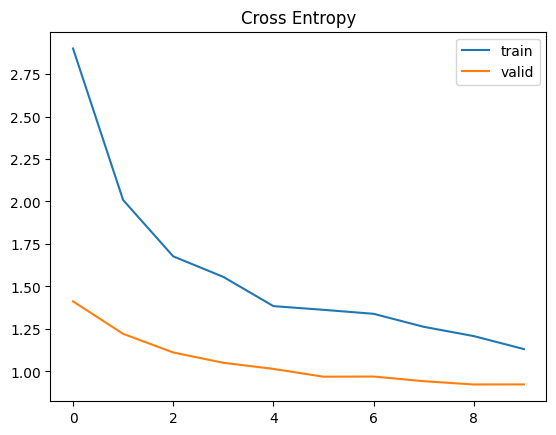

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

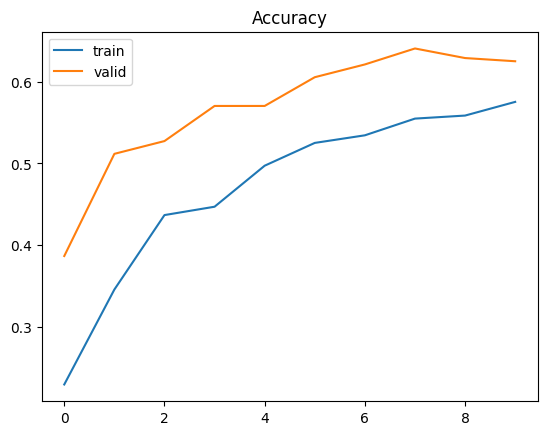

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio</font></h3>

Hemos obtenido muy buenos resultados del finetuning en MobileNet. Como se ha comentado, es una red muy sencilla pensada para móvil, por eso, se propone el uso de finetuning en otras redes de Keras, especialmente Inception y ResNet. También podéis ver como afectan los optimizadores como Adam o el proceso de finetuning de más capas.

In [ ]:
# TODO

---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio opcional</font></h3>

De las aplicaciones utilizar la arqutiectura VGG16, eliminar las dos últimas capas y agregarle una capa de Dropout y otra Densa de salida. 
Recuerde que debe lanzar los iteradores y todo el entreamiento.

In [ ]:
#TODO

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>